In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings(action='ignore')

In [96]:
df = pd.read_csv("./data/processed/pricesList.csv")
def preprocess_input(df):
    df = df.copy()

    # Drop rows with missing values if any
    df.dropna(inplace=True)

    # Split df into X and y
    X = df.drop("Price", axis=1)
    Y = df["Price"]

    return X, Y
X, Y = preprocess_input(df)

In [164]:
# Preprocessing pipeline
numeric_features = ['Week', 'Month', 'Year']
categorical_features = ['Name', 'Season']

numeric_transformer = Pipeline(steps=[
    ('num', 'passthrough')])  # No transformation needed for numeric features

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
regression_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', RandomForestRegressor())])

In [7]:
regression_model.fit(X, Y)
accuracy = regression_model.score(X, Y)
print("Accuracy:", accuracy)

Accuracy: 0.9907412767012852


In [104]:
def get_user_input():
    name = input("Enter the name of the item: ")
    week = int(input("Enter the week: "))
    month = int(input("Enter the month: "))
    year = int(input("Enter the year: "))
    if month in range(3, 5):
        season = "First Inter-monsoon Season"
    elif month in range(5, 10):
        season = "South-West Monsoon Season"
    elif month in range(10, 12):
        season = "Second Inter-monsoon Season"
    else:
        season = "North-East Monsoon Season"
    return {"Name": name, 'Week': week, 'Month': month, 'Year': year, 'Season': season}


In [110]:
user_data = get_user_input()
user_df = pd.DataFrame([user_data])
predicted_price = regression_model.predict(user_df)

# Display prediction
print("Predicted price:", predicted_price[0])


Predicted price: 1053.4608000000014


<Axes: ylabel='Price'>

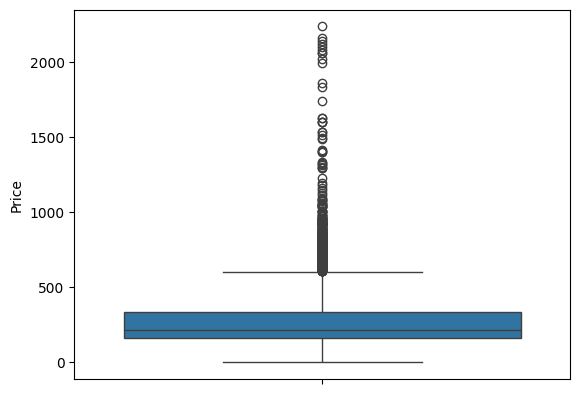

In [5]:
import seaborn as sns
data2 = df.copy()
data2.dropna()
sns.boxplot(data2["Price"])

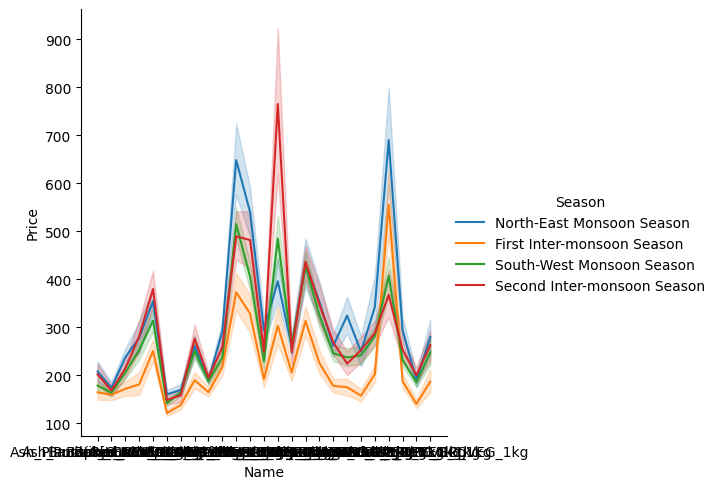

In [6]:
import plotly.express as px
sns.relplot(data=data2, x="Name", y="Price", hue="Season", kind="line")

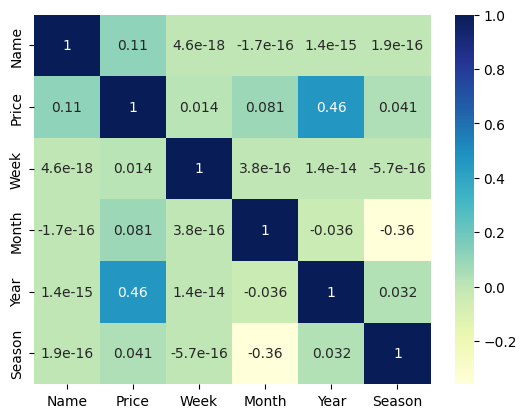

In [7]:
import matplotlib.pyplot as plt
dist = data2["Name"]
distset = set(dist)
dd = list(distset)
dictOfWords = { dd[i] : i for i in range(0, len(dd) ) }
data2["Name"] = data2["Name"].map(dictOfWords)

dist = (data2["Season"])
distset = set(dist)
dd = list(distset)
dictOfWords = { dd[i] : i for i in range(0, len(dd) ) }
data2["Season"] = data2["Season"].map(dictOfWords)

dataplot = sns.heatmap(data2.corr(), cmap="YlGnBu", annot=True)

plt.show()

# Test

In [19]:
import numpy as np

In [97]:
data2 = df.copy()
data2 = data2.dropna()

In [98]:
data2.shape

(8266, 6)

In [22]:
data2["Price"]

0        135.15
1        111.11
2        112.86
3         99.39
4        228.57
         ...   
8495    1333.85
8496     706.67
8497     615.00
8498     376.15
8499     777.04
Name: Price, Length: 8266, dtype: float64

In [23]:
# IQR
Q1 = np.percentile(data2["Price"], 25, interpolation = 'midpoint')
Q3 = np.percentile(data2["Price"], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

In [24]:
# Upper bound
upper = np.where(data2["Price"] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data2["Price"] <= (Q1-1.5*IQR))
print(upper[0], lower[0])

[  13   93  482  507  532  557  980 1005 1030 1055 1080 1105 1130 1155
 1180 1784 1798 1809 1823 1834 1848 1873 1898 1923 1948 1973 2151 2176
 2201 2226 2251 2276 2301 2323 2326 2347 2350 2371 2395 2943 2968 2993
 3502 4012 4037 4062 4087 4112 4137 4728 4752 4777 4801 4824 4848 4872
 4956 4981 5255 5622 5647 5672 5697 5722 5747 5769 5770 5794 5795 5805
 5819 5820 5830 5844 5845 5855 5869 5870 5880 5894 5895 5919 5920 5944
 5945 5968 5969 5979 5993 5994 6004 6018 6019 6029 6043 6044 6054 6068
 6079 6104 6129 6154 6168 6179 6193 6196 6204 6221 6229 6246 6248 6254
 6268 6269 6271 6273 6279 6282 6287 6293 6294 6296 6298 6299 6304 6307
 6312 6318 6319 6321 6323 6324 6329 6332 6337 6343 6344 6346 6348 6349
 6354 6357 6362 6368 6369 6371 6373 6374 6379 6382 6387 6393 6394 6396
 6398 6399 6404 6407 6418 6419 6421 6443 6444 6446 6468 6469 6471 6493
 6494 6518 6519 6523 6543 6544 6548 6549 6568 6569 6573 6574 6593 6594
 6619 6629 6644 6648 6654 6669 6673 6679 6694 6696 6698 6704 6719 6721
 6723 

In [25]:
data2.reset_index(inplace=True, drop=True)

# Removing the outliers
data2.drop(upper[0], inplace=True)
data2.drop(lower[0], inplace=True)

print("New Shape: ", data2.shape)

New Shape:  (7829, 6)


<Axes: ylabel='Price'>

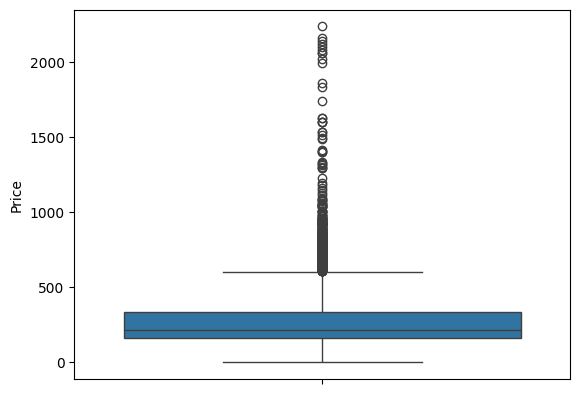

In [99]:
sns.boxplot(data2["Price"])

In [134]:
df = data2.copy()


X_train, X_test, Y_train, Y_test = preprocess_input(df)

In [160]:
regression_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', RandomForestRegressor(bootstrap=True, criterion='poisson',max_depth=None, max_leaf_nodes=None,n_estimators=250, random_state=None, n_jobs=1, verbose=0))])
regression_model.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num',
                                                                   'passthrough')]),
                                                  ['Week', 'Month', 'Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name', 'Season'])])),
                ('regressor',
                 RandomForestRegressor(criterion='poisson', n_estimators=250,
                                       n_jobs=1))])

In [161]:
accuracy = regression_model.score(X_test, Y_test)
print("Accuracy:", accuracy)
regression_model.fit(X_test, Y_test)

Accuracy: 0.9209039387125993


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num',
                                                                   'passthrough')]),
                                                  ['Week', 'Month', 'Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name', 'Season'])])),
                ('regressor',
                 RandomForestRegressor(criterion='poisson', n_estimators=250,
                                       n_jobs=1))])

In [163]:
import pickle
# Save the model as a pickle file
filename = './models/test_model.sav'
pickle.dump(regression_model, open(filename, 'wb'))

In [100]:
def preprocess_input(df):
    df = df.copy()

    # Drop rows with missing values if any
    df.dropna(inplace=True)

    # Split df into X and y
    X = df.drop("Price", axis=1)
    Y = df["Price"]

    # Train-test split
    X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.3, shuffle=True)

    return X_train, X_test, Y_train, Y_test

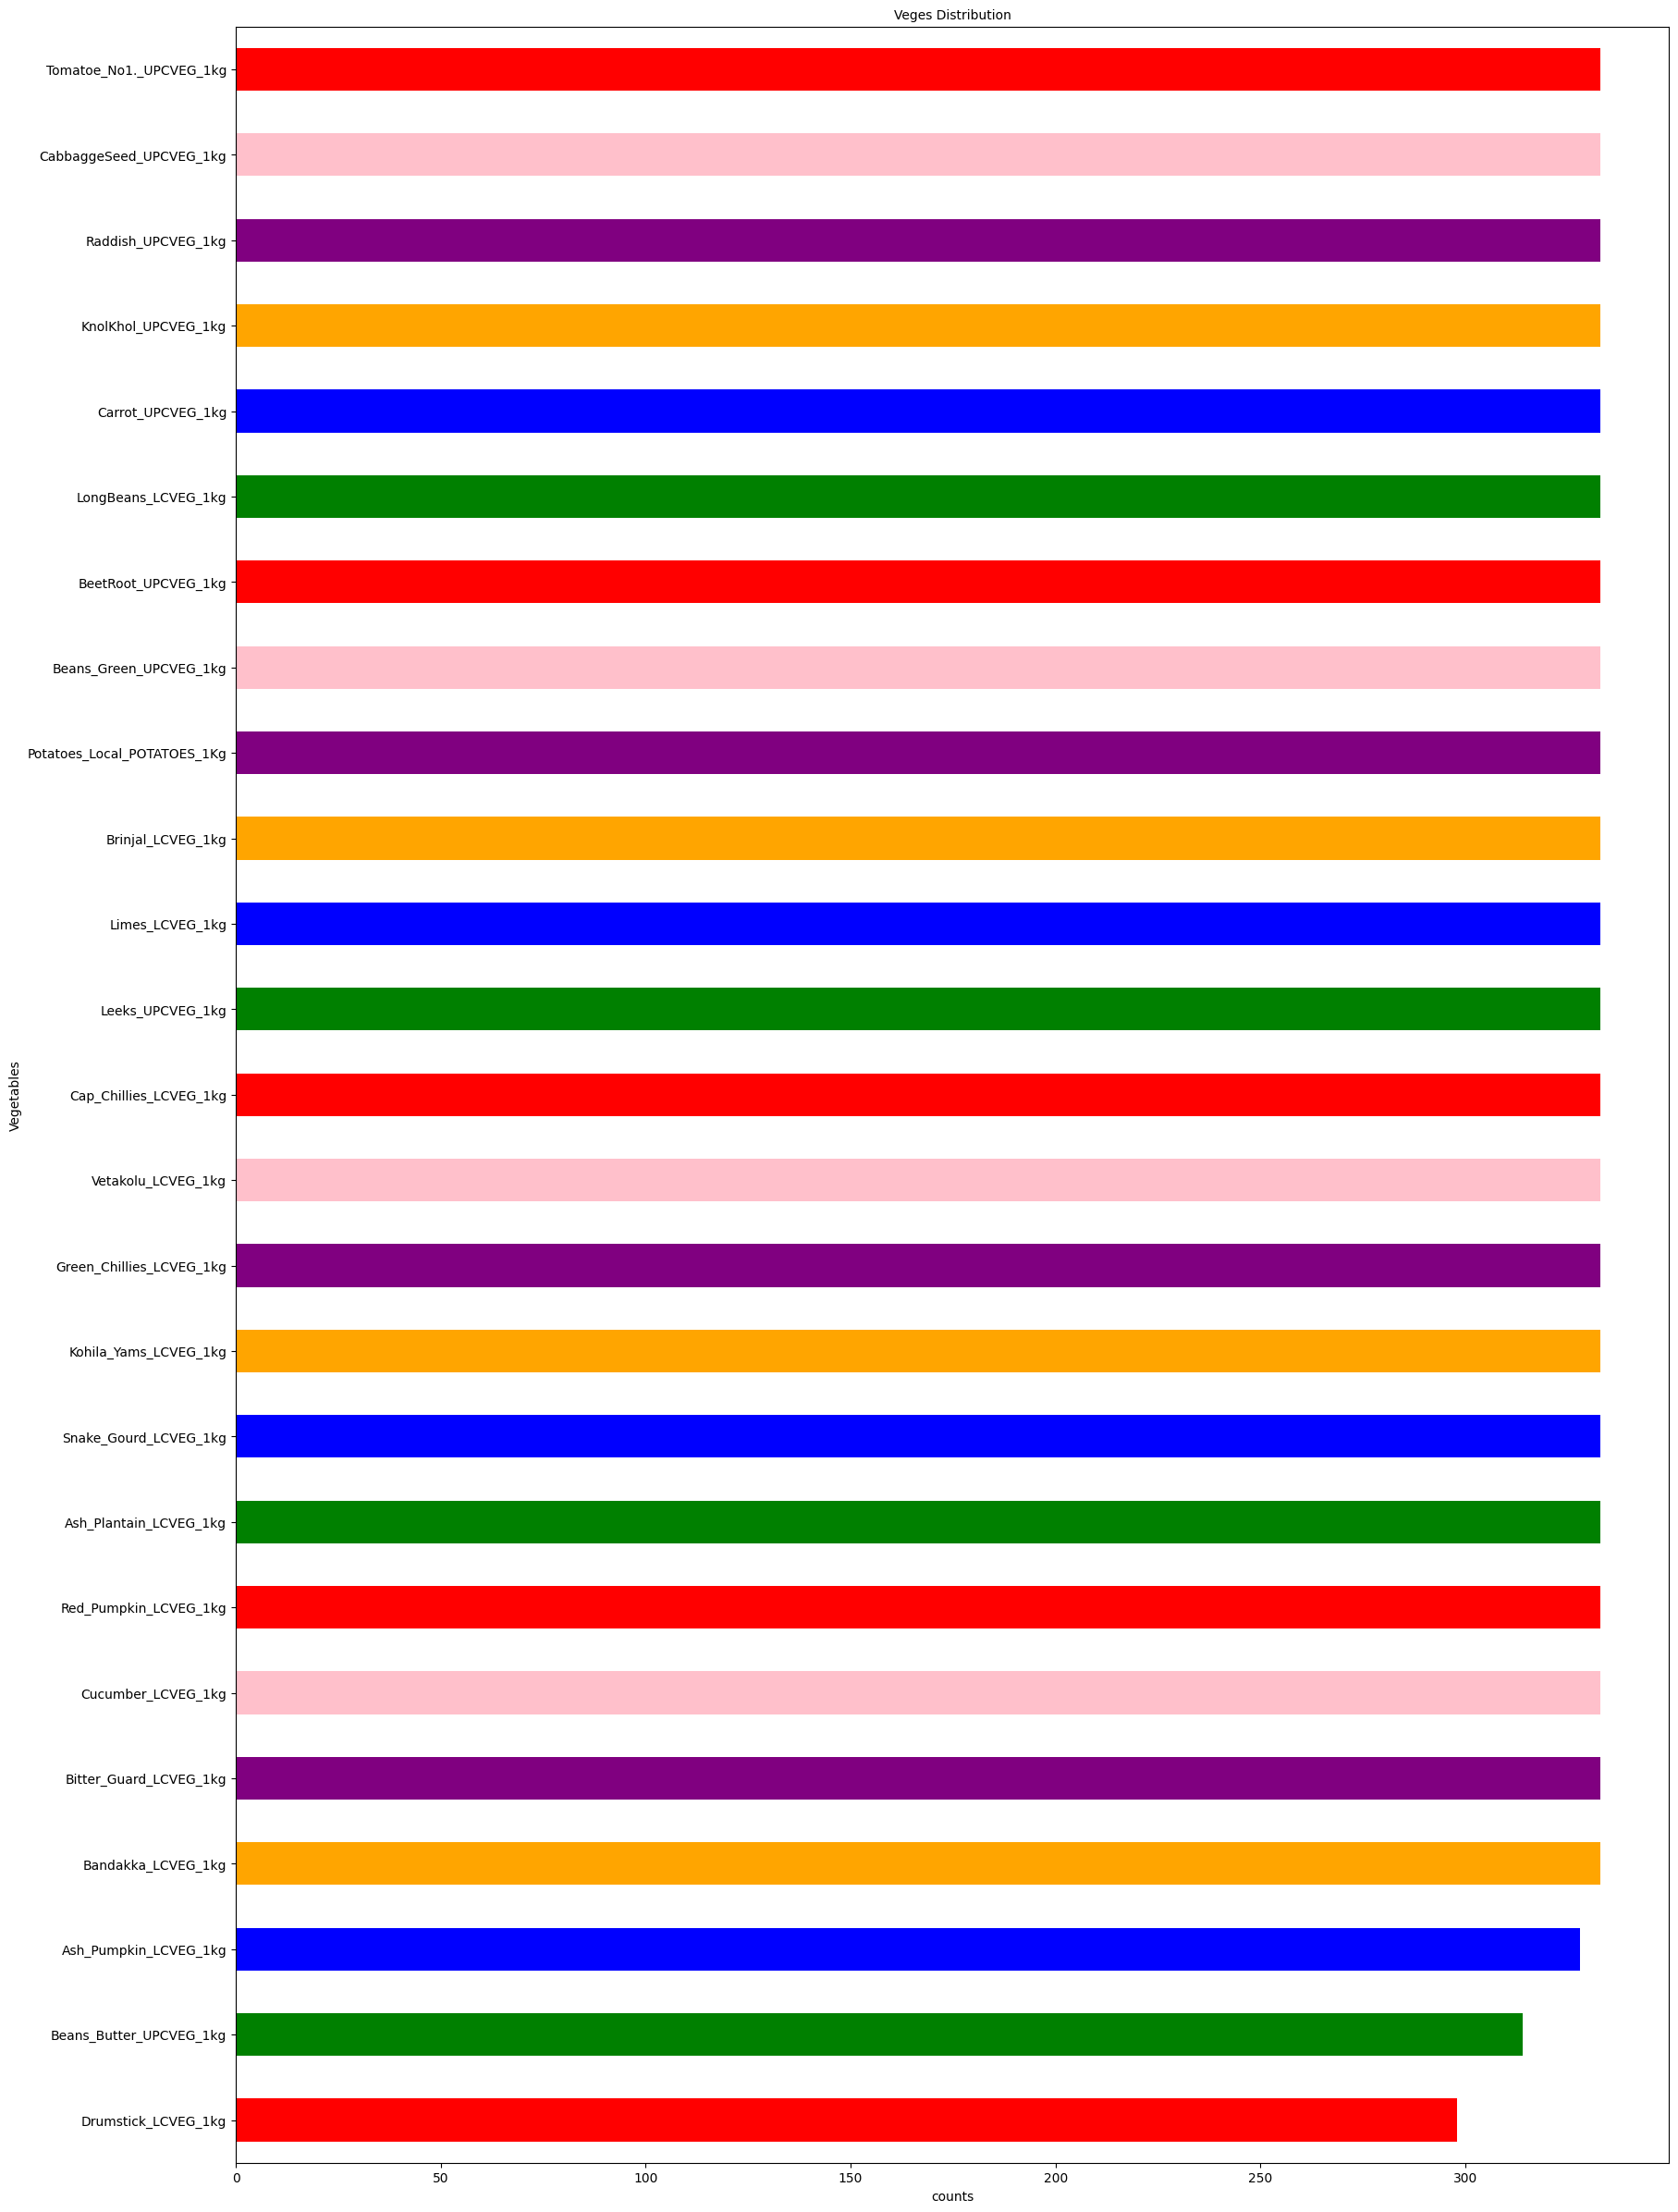

In [113]:
# Take a look at the class/breed distribution
ax=pd.value_counts(data2['Name'],ascending=True).plot(kind='barh',fontsize="10",title="Veges Distribution",figsize=(20,30),color=["red","green","blue","orange","purple","pink"])
ax.set(xlabel="counts", ylabel="Vegetables")
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.title.set_size(10)
plt.show()

In [114]:
data2.head()

,Name,Price,Week,Month,Year,Season
0,Ash_Plantain_LCVEG_1kg,135.15,1,1,2017,North-East Monsoon Season
1,Ash_Pumpkin_LCVEG_1kg,111.11,1,1,2017,North-East Monsoon Season
2,Bandakka_LCVEG_1kg,112.86,1,1,2017,North-East Monsoon Season
3,Brinjal_LCVEG_1kg,99.39,1,1,2017,North-East Monsoon Season
4,Bitter_Guard_LCVEG_1kg,228.57,1,1,2017,North-East Monsoon Season
